In [37]:
# Set up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\Silin Chen\Documents\Vandy\Spring2023\EDA\presentation\objects.csv')

C:\Users\Silin Chen\AppData\Local\Temp\ipykernel_24292\2264604679.py:7: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\Silin Chen\Documents\Vandy\Spring2023\EDA\presentation\objects.csv')


In [ ]:
# Print the column names to find out the exact spelling and casing
print(data.columns)

Index(['objectid', 'accessioned', 'accessionnum', 'locationid', 'title',
       'displaydate', 'beginyear', 'endyear', 'visualbrowsertimespan',
       'medium', 'dimensions', 'inscription', 'markings',
       'attributioninverted', 'attribution', 'provenancetext', 'creditline',
       'classification', 'subclassification', 'visualbrowserclassification',
       'parentid', 'isvirtual', 'departmentabbr', 'portfolio', 'series',
       'volume', 'watermarks', 'lastdetectedmodification', 'wikidataid',
       'customprinturl'],
      dtype='object')


In [35]:
# Select and rename the specified columns
cleaned_data = data[['objectid', 'accessionnum', 'creditline', 'classification']].copy()
cleaned_data.columns = ['Object_ID', 'Year_Accessioned','Credit_Line', 'Classification']

# Fill missing values in 'Credit_Line' with "Unknown"
cleaned_data['Credit_Line'].fillna('Unknown', inplace=True)

# Convert all entries in 'Classification' to lowercase to ensure consistency
cleaned_data['Classification'] = cleaned_data['Classification'].str.lower()

# Extracting the first four characters as year from 'accessionnum' and converting to float
# This conversion to float is to handle any potential NaN values that arise from the extraction
cleaned_data['Year_Accessioned'] = cleaned_data['Year_Accessioned'].str.extract(r'(^[\d]{4})').astype(float)

# Convert the float years to integer where not NaN
cleaned_data['Year_Accessioned'] = cleaned_data['Year_Accessioned'].dropna().astype(int)

# Verify the cleaning by displaying the first few entries in the new column
cleaned_data.head()

,Object_ID,Year_Accessioned,Credit_Line,Classification
0,0,1937,Andrew W. Mellon Collection,painting
1,1,1937,Andrew W. Mellon Collection,painting
2,17,1937,Andrew W. Mellon Collection,painting
3,70,1937,Andrew W. Mellon Collection,painting
4,25,1937,Andrew W. Mellon Collection,painting


C:\Users\Silin Chen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Silin Chen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Silin Chen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

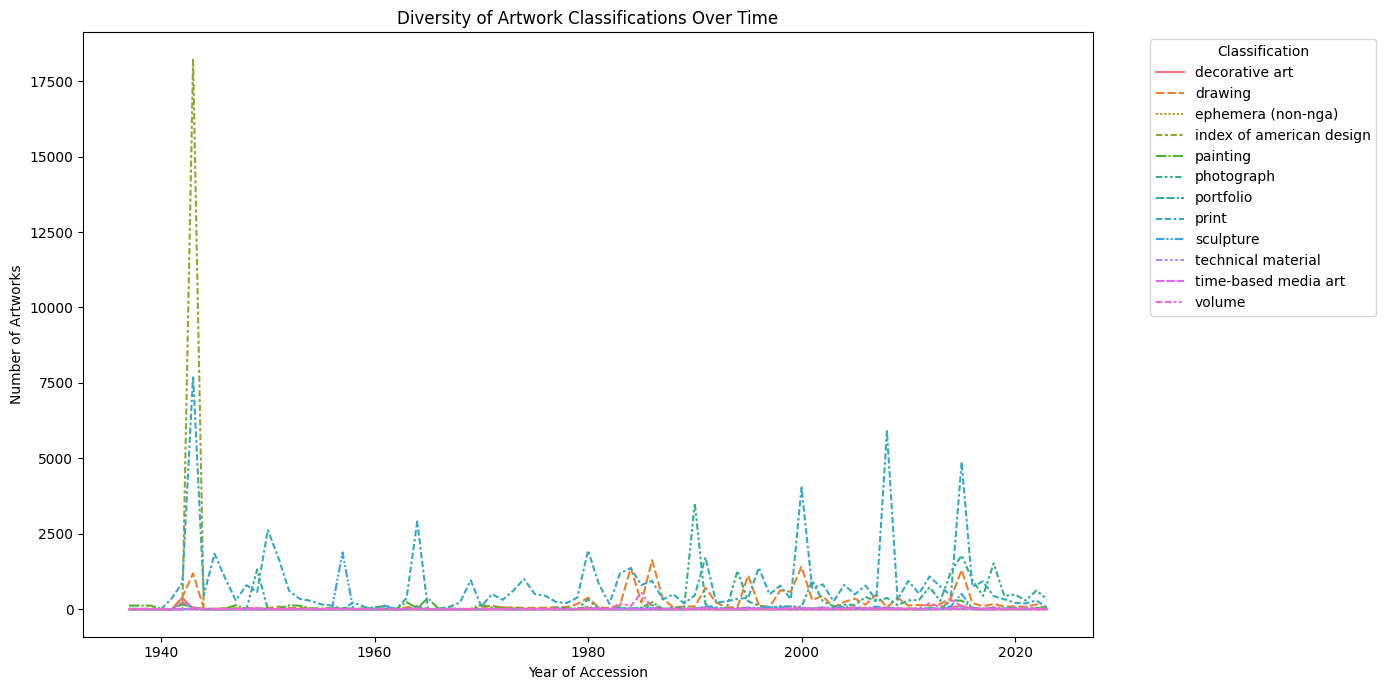

In [39]:
# Question 1 Plot: How has the diversity of artwork classifications evolved over time?
classification_over_time = cleaned_data.groupby(['Year_Accessioned', 'Classification']).size().reset_index(name='Counts')
classification_pivot = classification_over_time.pivot(index='Year_Accessioned', columns='Classification', values='Counts').fillna(0)
plt.figure(figsize=(14, 7))
sns.lineplot(data=classification_pivot)
plt.title('Diversity of Artwork Classifications Over Time')
plt.xlabel('Year of Accession')
plt.ylabel('Number of Artworks')
plt.legend(title='Classification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Silin Chen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Silin Chen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Silin Chen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

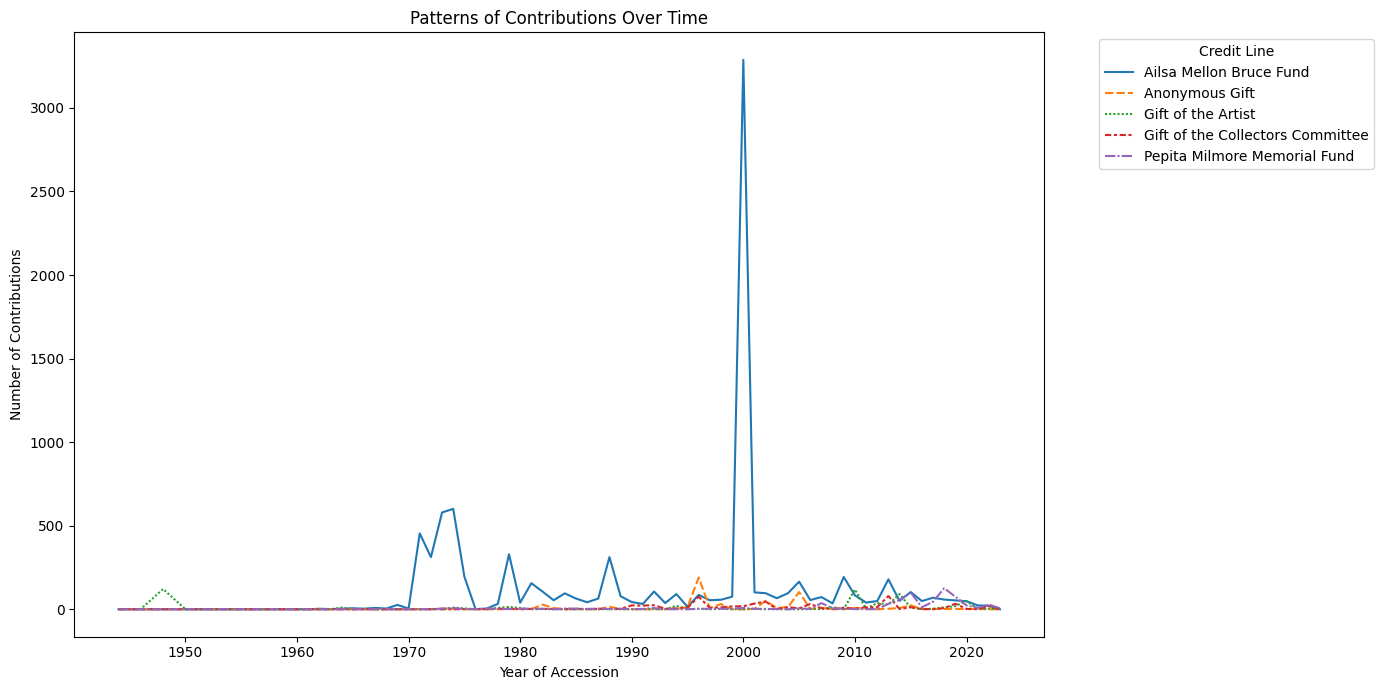

In [43]:
# Question 2 Plot: What are the patterns in contributions over time?
contributions_over_time = cleaned_data.groupby(['Year_Accessioned', 'Credit_Line']).size().reset_index(name='Counts')
top_credit_lines = contributions_over_time['Credit_Line'].value_counts().head().index
top_contributions_over_time = contributions_over_time[contributions_over_time['Credit_Line'].isin(top_credit_lines)]
contributions_pivot = top_contributions_over_time.pivot(index='Year_Accessioned', columns='Credit_Line', values='Counts').fillna(0)
plt.figure(figsize=(14, 7))
sns.lineplot(data=contributions_pivot)
plt.title('Patterns of Contributions Over Time')
plt.xlabel('Year of Accession')
plt.ylabel('Number of Contributions')
plt.legend(title='Credit Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()